<a href="https://colab.research.google.com/github/Javediamon/Data_Analysis_Projects/blob/main/Data_Analysis(Hotel_Bookings).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective 1:** Determining Cancellation Influencers

* Identify the key factors and variables that significantly influence hotel reservation cancellations.

# **Objective 2:** Enhancing Reservation Cancellation Procedures

* Develop and recommend improvements to hotel reservation cancellation processes to minimize cancellations and optimize guest satisfaction.

# **Objective 3:** Supporting Pricing and Promotional Strategies

* Provide data-driven guidance to assist hotels in making informed decisions regarding pricing strategies and promotional activities, ensuring better revenue management and customer engagement.

# **Hypothesis**



1.   More Cancellation accur when prices are higher.
2.   When there is a longer waiting list customer tends to cancel more frequently.

1.   The majority of clients are coming onlioe travel agent to make there reservations







# **Analysis and Findings**

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(os.listdir())

# **Loading the dataset**

In [ ]:
df=pd.read_csv('hotel_booking.csv')  # read the dataset

# **Exploratory Data Analysis and Data Cleaning**

In [ ]:
df.head(5)   # getting first five rows of dataset

In [ ]:
df.tail() # getting last five rows of dataset

In [ ]:
df.shape  # Getting shape for the dataset

In [ ]:
df.columns   # getting all the columns of dataset

In [ ]:
df.info()    # for checking Non_null count and datatypes

In [ ]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])  # changing the datatype of reservation_status_date columns

In [ ]:
df.duplicated().sum()  # checking is there duplicate data in dataset or not

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')


In [ ]:
for col in (df.describe(include='object')).columns:  # checking all categorical coulumns and there categories.
  print(col)
  print(df[col].unique())
  print('-'*70)

In [ ]:
df.isnull().sum() # to check missing values

In [ ]:
df.drop(['agent','company'],axis=1,inplace =True) # drop the agent and company column

In [ ]:
df.dropna(inplace =True) # remove the null values in dataset

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
sns.boxplot(df['adr'])  # to check outliers we use Box plot (whisker plot)

In [ ]:
q1=df['adr'].quantile([0.25]).values[0]

In [ ]:
q1

70.0

In [ ]:
q3=df['adr'].quantile(0.75)
q3

126.0

In [ ]:
iqr=q3-q1
iqr

56.0

In [ ]:
max=q3+(1.5*iqr)

In [ ]:
max

210.0

In [ ]:
df['adr']=np.where(df['adr']>max,max,df['adr'])   # treating outliers

In [ ]:
sns.boxplot(df['adr'])

# **Data Analysis and Visualization**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df['is_canceled'].value_counts(normalize =True)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

In [ ]:
cancel_per=df['is_canceled'].value_counts()

Text(0.5, 1.0, 'Reservation status count')

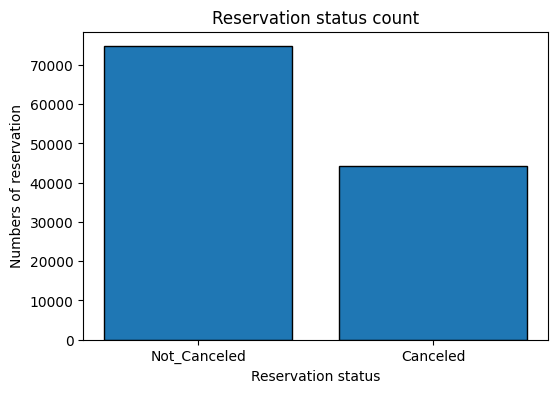

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(['Not_Canceled','Canceled'],cancel_per,edgecolor='black')
plt.xlabel('Reservation status')
plt.ylabel('Numbers of reservation')
plt.title('Reservation status count')


# **The accompanying bar graph illustrates the percentage of reservations that have been canceled and those that have not. It is evident that a substantial number of reservations remain uncancelled. With 37% of clients having canceled their reservations, this has a noteworthy impact on hotel earnings.**

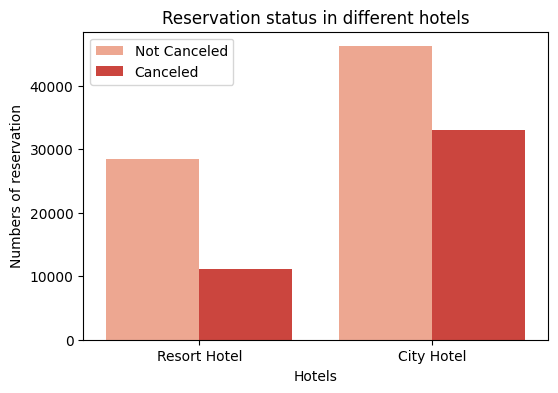

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='hotel',hue='is_canceled',data=df,palette= 'Reds')
plt.title('Reservation status in different hotels')
legend_label = ['Not Canceled', 'Canceled']
plt.ylabel('Numbers of reservation')
plt.xlabel('Hotels')
plt.legend(legend_label)
plt.show()






# **In comparison to city hotels, resort hotels tend to have higher booking rates. This discrepancy could be attributed to the possibility that resort hotels are generally more expensive than their city counterparts.**

In [ ]:
resort_hotel =df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

In [ ]:
df['hotel'].value_counts(normalize=True)

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

In [ ]:
resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()

In [ ]:
city_hotel= city_hotel.groupby('reservation_status_date')[['adr']].mean()

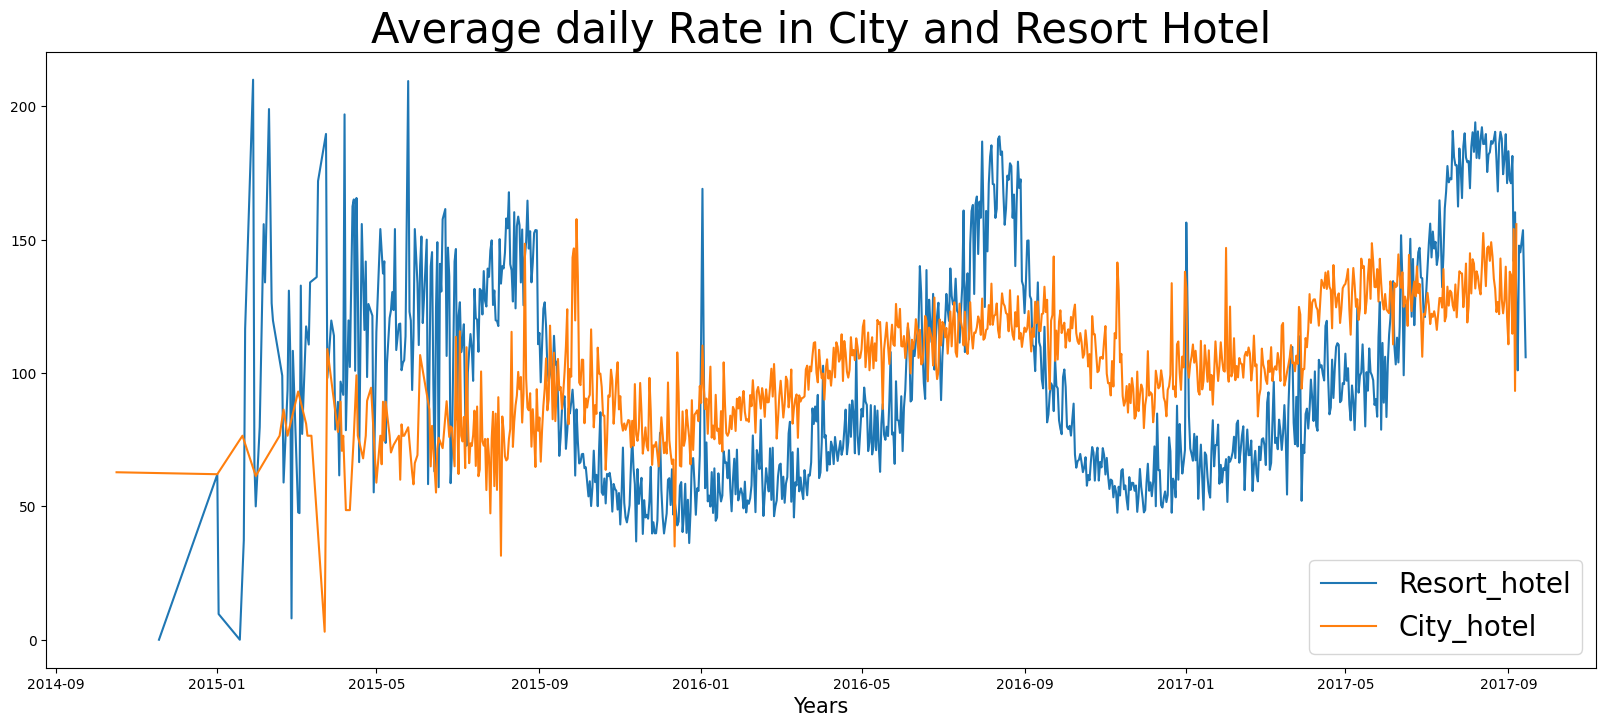

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort_hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City_hotel')
plt.xlabel('Years',fontsize=15)
plt.title('Average daily Rate in City and Resort Hotel',fontsize=30)
plt.legend(fontsize=20)

# **The line graph above shows that on certain days, the average daily rate for a  city hotels is less than that of a resort hotels and on other days it is even less. It goes without saying that weekends and holidays may see a rise in resort hotels rate.**

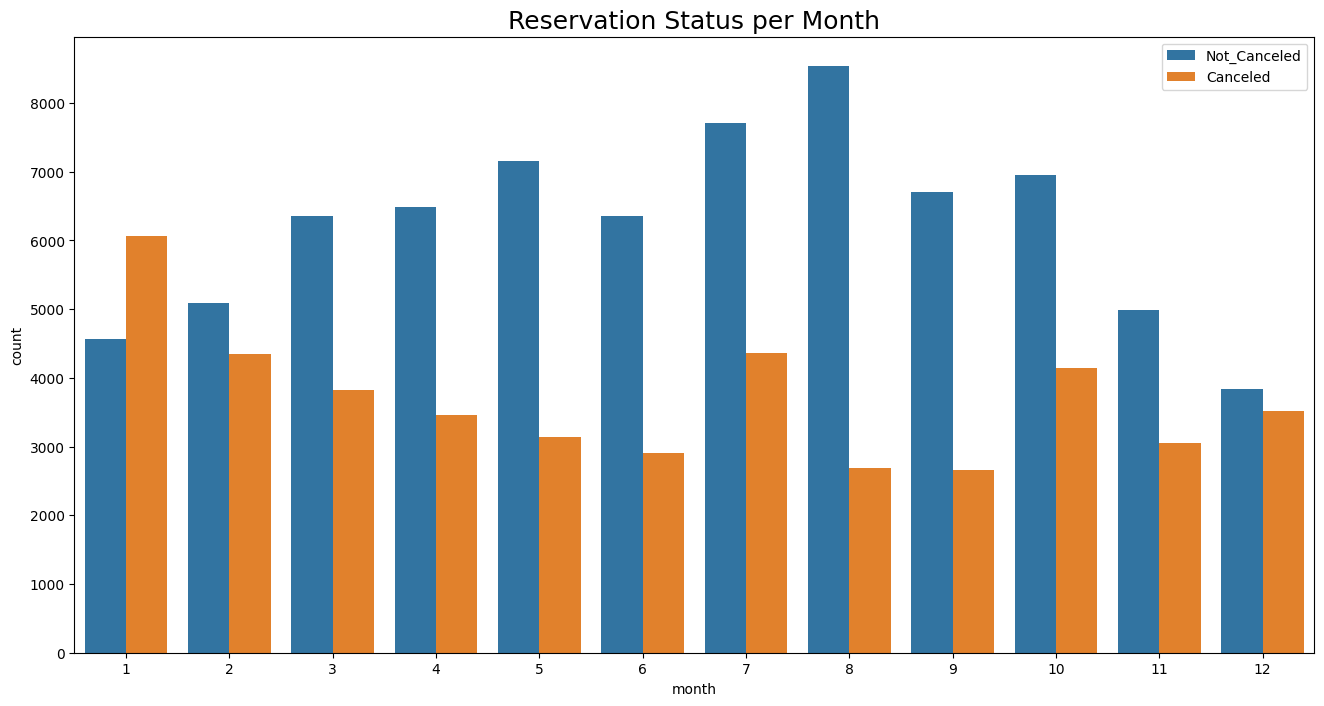

In [ ]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue ='is_canceled',data =df)
plt.title('Reservation Status per Month',fontsize=18)
legend_label=['Not_Canceled','Canceled']
plt.legend(legend_label)

# **We have created a grouped bar graph to analyze monthly reservation trends based on reservation status. Notably, August stands out as the month with the highest number of  confirmed reservations. Conversely, January records the highest number of canceled reservations.**

In [ ]:
Apm= df[df['is_canceled']==1].groupby('month')['adr'].sum()

In [ ]:
Apm

month
1     569538.66
2     445786.98
3     420363.92
4     418249.06
5     383965.46
6     351306.61
7     470440.57
8     318804.30
9     272548.10
10    330024.95
11    280971.67
12    318619.74
Name: adr, dtype: float64

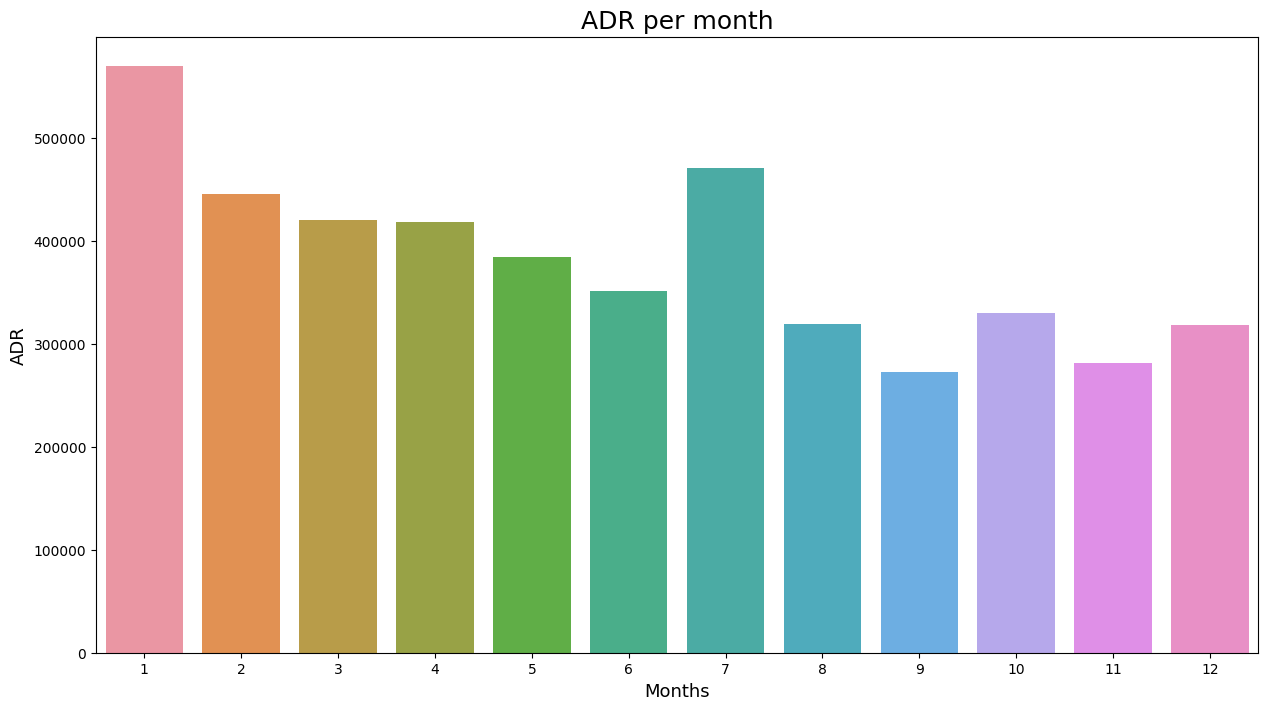

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=Apm,x=Apm.index)
plt.title('ADR per month',fontsize=18)
plt.xlabel('Months',fontsize=13)
plt.ylabel('ADR',fontsize=13)
plt.show()

# **The bar graph clearly shows that cancellations increase as prices rise and decrease as prices fall. This suggests that accommodation costs have a significant impact on cancellations.**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'month'],
      dtype='object')

In [ ]:
canceled_data=df[df['is_canceled']==1]
Top_10_country=canceled_data['country'].value_counts()[:10]
Top_10_country

PRT    27515
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 country with reservation canceled')

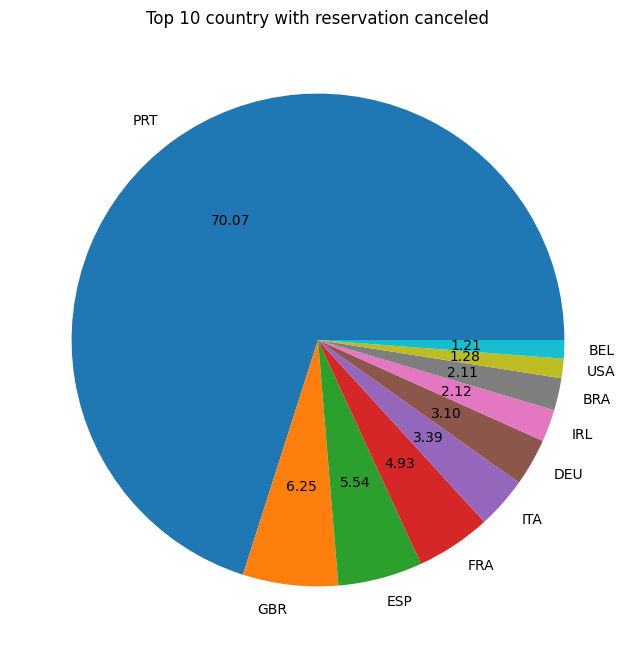

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Top_10_country,autopct ='%.2f',labels=Top_10_country.index)
plt.title('Top 10 country with reservation canceled')


# Now, let's see which country has the highest reservation canceled. The top country is **Portugal** with the highest number of cancellations.

In [ ]:
df['market_segment'].value_counts(normalize =True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

# **"Let's examine the sources from which guests make hotel reservations. Approximately 47% of clients use online travel agencies, 16% come from groups, while only 10% book directly at the hotels."**

In [ ]:
canceled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469685
Groups           0.273979
Offline TA/TO    0.187484
Direct           0.043485
Corporate        0.022150
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [ ]:
Cancel_adr= canceled_data.groupby('reservation_status_date')[['adr']].mean()

In [ ]:
Not_canceled_data=df[df['is_canceled']==0]

In [ ]:
Not_cancel_adr= Not_canceled_data.groupby('reservation_status_date')[['adr']].mean()

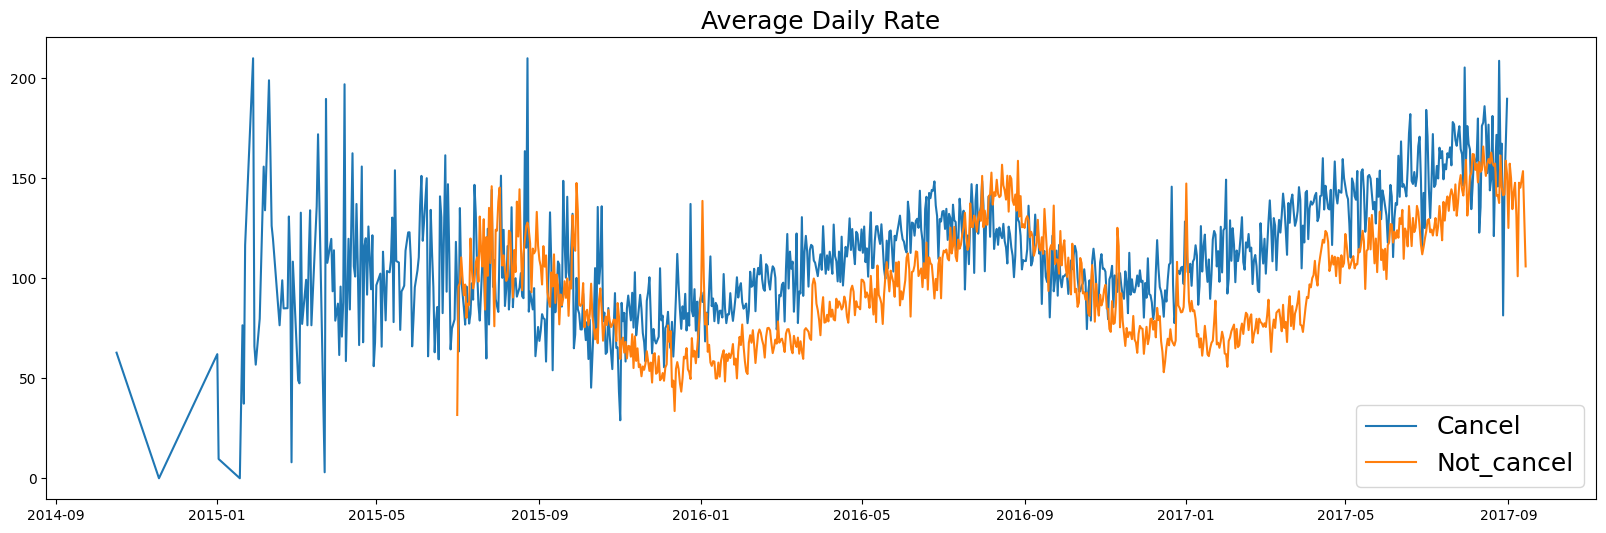

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(Cancel_adr.index,Cancel_adr,label='Cancel')
plt.plot(Not_cancel_adr.index,Not_cancel_adr,label='Not_cancel')
plt.title('Average Daily Rate',fontsize=18)
plt.legend(fontsize=18)

# **"The graph demonstrates that reservations are canceled more frequently when the average daily rate is higher. This reinforces our earlier analysis that higher prices lead to increased cancellations."**

# **Suggestions**

* Optimize Pricing Strategies: To reduce cancellations, hotels can refine pricing strategies by offering location-specific discounts and consumer-friendly promotions.

* Weekend and Holiday Discounts: To mitigate cancellations in resort hotels, providing competitive discounts on weekends and holidays can be effective.

* January Marketing Campaigns: A targeted marketing campaign in January can help boost revenue, given the higher cancellation rates during this month.

* Enhance Quality and Service: Improving hotel quality and services, particularly in Portugal, can contribute to lower cancellation rates.

**Thankyou !!**